# 11/3

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## A Tiny Toy Network

### One-Layer Cos Function(l) + ReLU function

In [2]:
x_train = np.array([[0.0, 0.0, 1.0], 
                    [1.0, 1.0, 1.0], 
                    [1.0, 0.0, 1.0], 
                    [0.0, 1.0, 1.0]], dtype="float32")

y_train = np.array([[0.0, 1.0, 1.0, 0.0]], dtype="float32").T

In [3]:
x_t = tf.convert_to_tensor(x_train)
y_t = tf.convert_to_tensor(y_train)
print("x_train : \n", x_t)
print("\n")
print("y_train : ", y_t)
print("\n")

x_train : 
 tf.Tensor(
[[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]], shape=(4, 3), dtype=float32)


y_train :  tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)




In [4]:
W1 = tf.Variable(initial_value=tf.random.normal([3, 1], stddev=0.03), name="W1", dtype=tf.float32)
b1 = tf.Variable(initial_value=tf.random.normal([1]), name="b1", dtype=tf.float32)

In [5]:
print("weight : \n", W1)
print("\n")
print("bias : ", b1)
print("\n")

weight : 
 <tf.Variable 'W1:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08926897],
       [-0.01771333],
       [ 0.03064514]], dtype=float32)>


bias :  <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([0.24189162], dtype=float32)>




In [6]:
@tf.function
def pre_out_func(x, w, b):
    return tf.nn.relu(tf.add(tf.matmul(x, w), b))

In [7]:
# 函式 pre_out_func(x, w, b) 測試 : 
test = pre_out_func(x_t, W1, b1)
test

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.27253675],
       [0.3440924 ],
       [0.36180574],
       [0.25482345]], dtype=float32)>

In [8]:
@tf.function
def cost(x, y, w, b):
    err = pre_out_func(x, w, b) - y
    sq_err = tf.square(err)
    return tf.reduce_mean(sq_err)

@tf.function
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = cost(x, y, w, b)
    return [tape.gradient(loss_, [w, b]), loss_]

In [9]:
# lr_rate = 0.01
# delta_W, delta_b = grad(x_t, y_t, W1, b1)
# ch_W, ch_b = delta_W * lr_rate, delta_b * lr_rate

# W1.assign_sub(ch_W)
# b1.assign_sub(ch_b)
# print(W1)
# print("\n")
# print(b1)

In [10]:
lr_rate = 0.01
epochs = 500
loss_list = []
for k in range(epochs):
    loss_tmp = grad(x_t, y_t, W1, b1)[1]
    delta_W, delta_b = grad(x_t, y_t, W1, b1)[0]
    ch_W, ch_b = delta_W * lr_rate, delta_b * lr_rate
    W1.assign_sub(ch_W)
    b1.assign_sub(ch_b)
    loss_list.append(loss_tmp)

In [11]:
print("weight : \n", W1)
print("\n")
print("bias : ", b1)
print("\n")

weight : 
 <tf.Variable 'W1:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.90549535],
       [-0.02165955],
       [-0.07343143]], dtype=float32)>


bias :  <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([0.13781522], dtype=float32)>




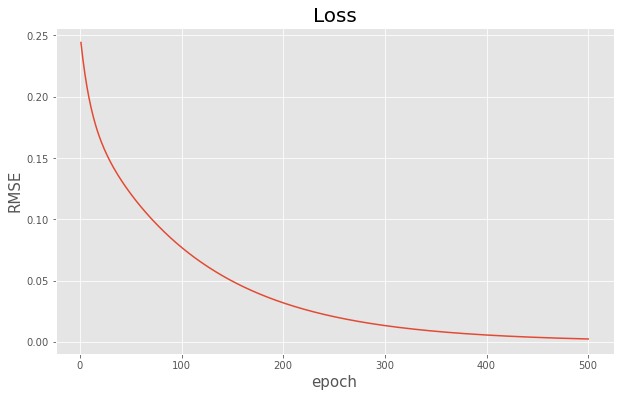

In [12]:
epochs = np.linspace(1, epochs, epochs)
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_list)
plt.title("Loss", fontsize=20)
plt.xlabel("epoch", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.show()

In [13]:
X = np.array([[1, 1, 1]], dtype="float32")
x_test = tf.convert_to_tensor(X)
pre_result = pre_out_func(x_test, W1, b1)
print("y predict : ", pre_result)
error = cost(x_test, y_t, W1, b1)
print("error : ", error)

y predict :  tf.Tensor([[0.9482196]], shape=(1, 1), dtype=float32)
error :  tf.Tensor(0.4509008, shape=(), dtype=float32)
